In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels
from statsmodels.api import stats

In [260]:
data=pd.read_csv('/Users/sridharmanthripragada/Downloads/yulu-scaler.csv')

In [261]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [262]:
data.shape

(10886, 12)

In [263]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [264]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [265]:
data.isnull().sum() #There are no null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [266]:
data[data.duplicated()] #there are no duplicate values

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [267]:
data['season'].unique()

array([1, 2, 3, 4])

In [268]:
#We know that the seasons are mentioned in the following order
#season (1: spring, 2: summer, 3: fall, 4: winter)

#For eda purposes, I will replace these values and use them in hypothesis testing

In [269]:
data['season'].replace([1,2,3,4],['spring','summer','fall','winter'], inplace=True)

In [270]:
data['season'].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [271]:
#We are given the following things about the weather:
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [272]:
#again I am going to replace values in the weather column to make it easier to understand in eda

In [273]:
#I will do one hot encoding via get_dummies or use the OneHotEncoder model to convert it when I need to do the prediction

In [274]:
data['weather'].replace({1:'Clear',2:'Misty', 3:'Light rain', 4:'Heavy rain'}, inplace=True)

In [275]:
data['weather'].value_counts()

weather
Clear         7192
Misty         2834
Light rain     859
Heavy rain       1
Name: count, dtype: int64

In [276]:
#We are given that count is count of total rental bikes including both casual and registered 
#so I will change the name to total_count just to avoid confusion

In [277]:
data.rename(columns={'count':'total_count'}, inplace=True)

In [278]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1


In [279]:
data.dtypes

datetime        object
season          object
holiday          int64
workingday       int64
weather         object
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
total_count      int64
dtype: object

In [280]:
#I will also make holiday and working day as object because it is either 1 or 0 so it should be categorical

In [281]:
data[['holiday','workingday']]=data[['holiday','workingday']].astype('object')

In [282]:
data.dtypes

datetime        object
season          object
holiday         object
workingday      object
weather         object
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
total_count      int64
dtype: object

In [283]:
data.rename(columns={'atemp':'temp_felt'}, inplace=True)

In [284]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_felt', 'humidity', 'windspeed', 'casual', 'registered',
       'total_count'],
      dtype='object')

In [285]:
#Now checking the distribution of all numeric variables

In [286]:
data.describe()

,temp,temp_felt,humidity,windspeed,casual,registered,total_count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot: ylabel='Density'>

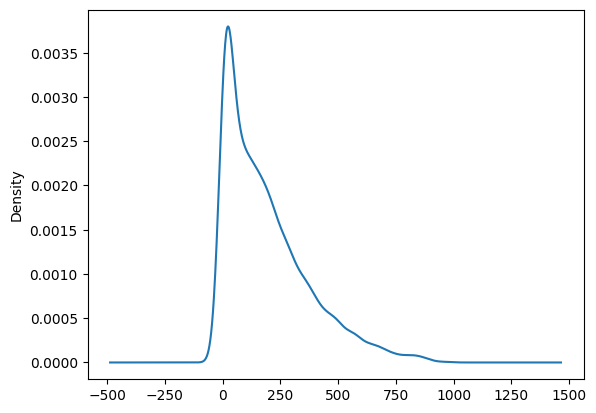

In [287]:
data['total_count'].plot(kind='kde') #This is a right tailed distribution

In [288]:
#This also shows that there are values where the total count <0

In [289]:
data[data['total_count']<=0]

,datetime,season,holiday,workingday,weather,temp,temp_felt,humidity,windspeed,casual,registered,total_count


<AxesSubplot: ylabel='Density'>

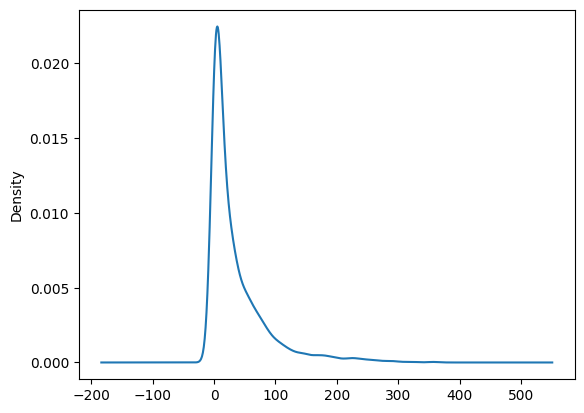

In [290]:
data['casual'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

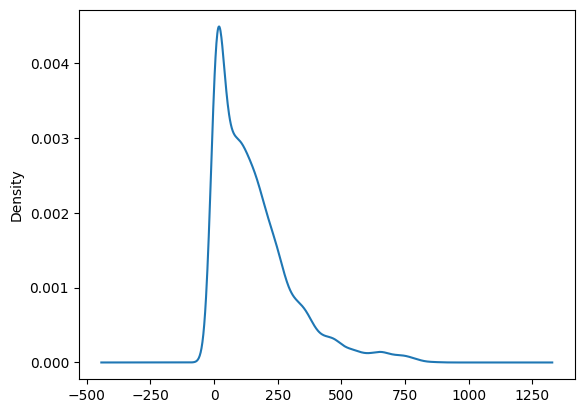

In [291]:
data['registered'].plot(kind='kde')

In [292]:
num_cols=data.select_dtypes(include='number')

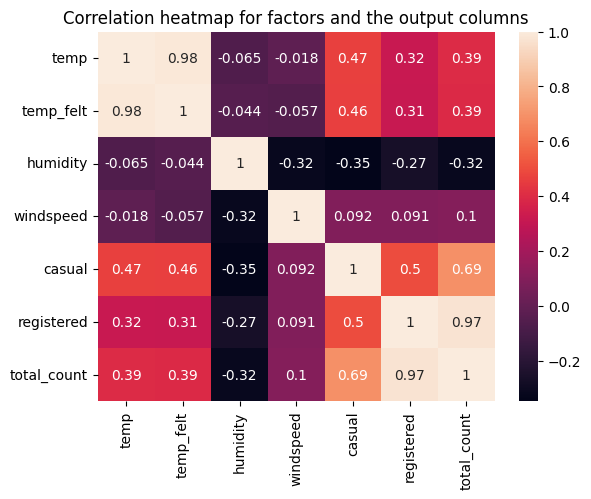

In [293]:
sns.heatmap(num_cols.corr(), annot=True)
plt.title('Correlation heatmap for factors and the output columns')
plt.show()

In [294]:
#This tells me that:
#1. Majority of the bikes are registered and very few are casual
#2. As the temperature increases, the count of bikes should increase, yet because the correlation is only .46 we are not sure
#3. As the humidity increases, the count of bikes decreases, again correlation is only about .31 or .32
#4. Temperature and humidity do not affect each other so we can have hot and sultry or hot and dry or cold and humid or cold and dry, all are equally possible
#4. When the humidity is high, the windspeed is low and vice versa, while temperature has no relation to windspeed

In [295]:
#First we do eda to check if the count varies with weather
data.groupby('weather')['total_count'].mean()

weather
Clear         205.236791
Heavy rain    164.000000
Light rain    118.846333
Misty         178.955540
Name: total_count, dtype: float64

In [296]:
#We can do the same thing for season as well
data.groupby(['season'])['total_count'].mean()

season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: total_count, dtype: float64

<AxesSubplot: xlabel='humidity', ylabel='total_count'>

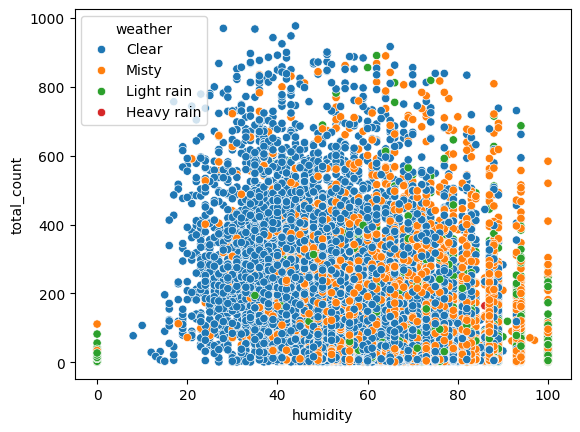

In [297]:
sns.scatterplot(data=data, x='humidity', y='total_count', hue='weather')

In [298]:
#the graph shows that most bikes are present when the when the weather is clear or misty. 
#there are very few bikes when there is light or heavy rain

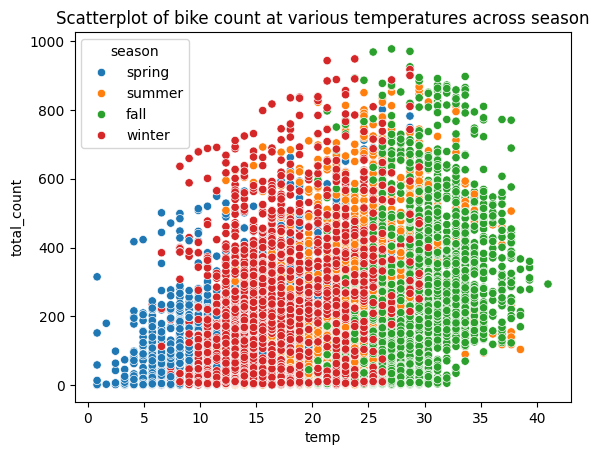

In [299]:
sns.scatterplot(data=data, x='temp', y='total_count',hue='season')
plt.title('Scatterplot of bike count at various temperatures across season')
plt.show()

In [300]:
#this shows very few bikes are around in spring and most of them are in winter and at higher temperatures in the fall

<Figure size 1000x500 with 0 Axes>

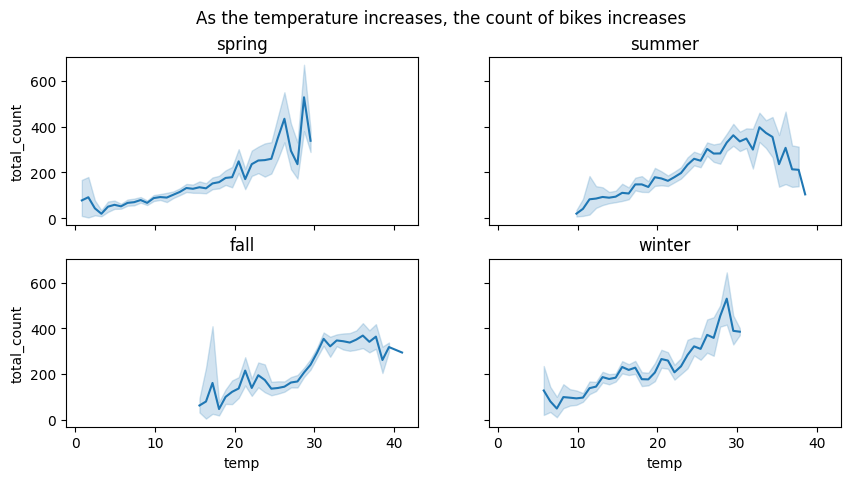

In [301]:
plt.figure(figsize=(10,5))
fig, axes=plt.subplots(2,2, sharex=True, sharey=True)
fig.figure.set_figwidth(10)
sns.lineplot(data=data[data['season']=='spring'],x='temp',y='total_count', ax=axes[0,0])
axes[0,0].title.set_text('spring')
sns.lineplot(data=data[data['season']=='summer'], x='temp', y='total_count',ax=axes[0,1])
axes[0,1].title.set_text('summer')
sns.lineplot(data=data[data['season']=='fall'], x='temp', y='total_count', ax=axes[1,0])
axes[1,0].title.set_text('fall')
sns.lineplot(data=data[data['season']=='winter'], x='temp', y='total_count', ax=axes[1,1])
axes[1,1].title.set_text('winter')
fig.suptitle('As the temperature increases, the count of bikes increases')
plt.show()

<Figure size 1000x500 with 0 Axes>

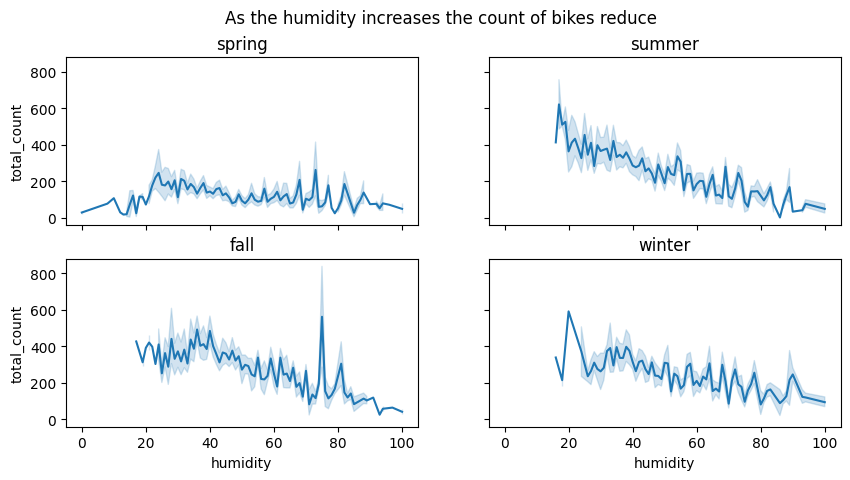

In [302]:
plt.figure(figsize=(10,5))
fig, axes=plt.subplots(2,2, sharex=True, sharey=True)
fig.figure.set_figwidth(10)
sns.lineplot(data=data[data['season']=='spring'],x='humidity',y='total_count', ax=axes[0,0])
axes[0,0].title.set_text('spring')
sns.lineplot(data=data[data['season']=='summer'],x='humidity',y='total_count', ax=axes[0,1])
axes[0,1].title.set_text('summer')
sns.lineplot(data=data[data['season']=='fall'],x='humidity',y='total_count', ax=axes[1,0])
axes[1,0].title.set_text('fall')
sns.lineplot(data=data[data['season']=='winter'],x='humidity',y='total_count', ax=axes[1,1])
axes[1,1].title.set_text('winter')
plt.suptitle('As the humidity increases the count of bikes reduce')
plt.show()


<AxesSubplot: ylabel='Density'>

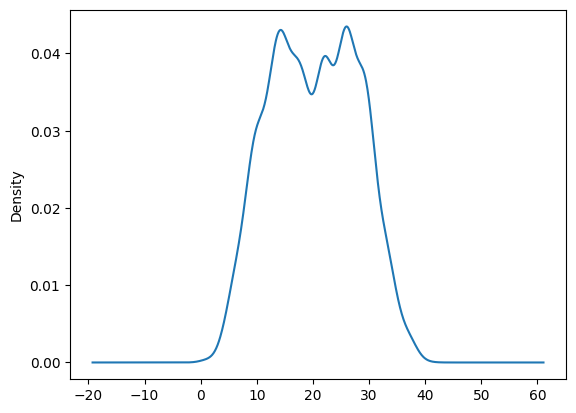

In [303]:
data['temp'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

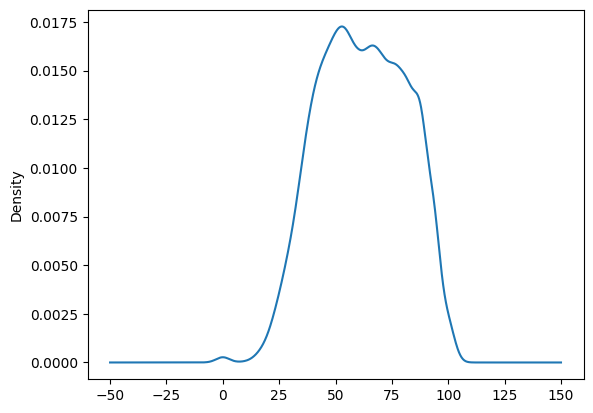

In [304]:
data['humidity'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

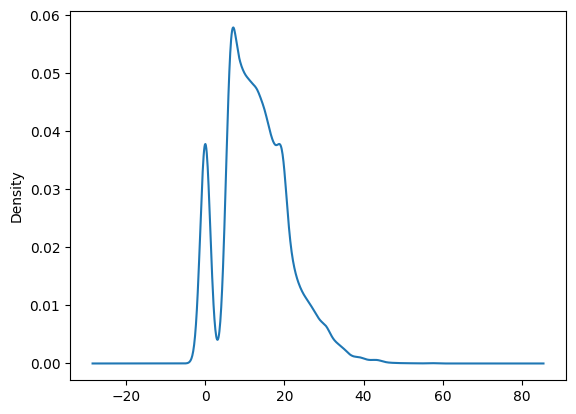

In [305]:
data['windspeed'].plot(kind='kde')

<AxesSubplot: xlabel='temp', ylabel='humidity'>

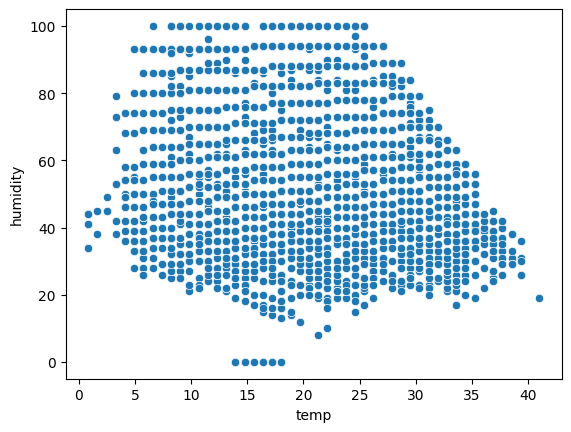

In [306]:
sns.scatterplot(data=data, x='temp', y='humidity') #this clearly shows that the humidity at each temperature level is constant

<AxesSubplot: xlabel='humidity', ylabel='windspeed'>

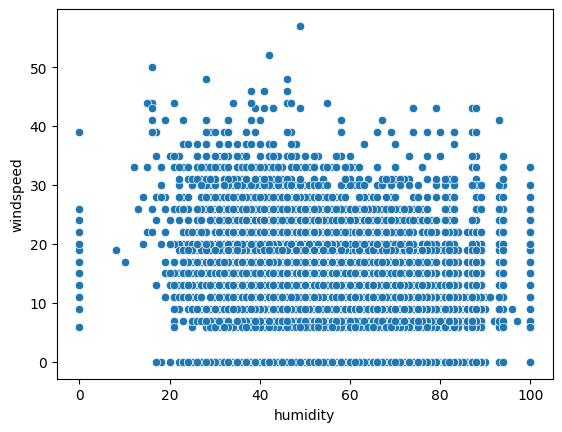

In [307]:
sns.scatterplot(data=data, x='humidity', y='windspeed') #The windspeed is more or less constant for any humidity 

<AxesSubplot: xlabel='season', ylabel='total_count'>

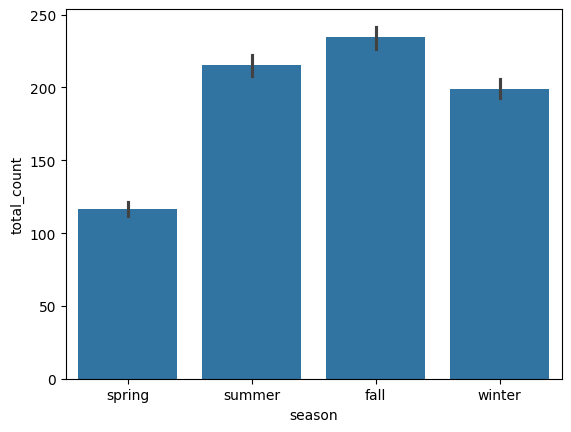

In [308]:
sns.barplot(data=data, x='season', y='total_count')

<AxesSubplot: xlabel='weather', ylabel='total_count'>

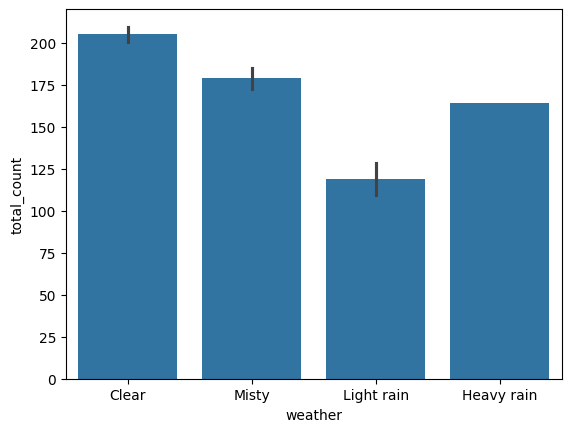

In [309]:
sns.barplot(data=data, x='weather',  y='total_count')

In [310]:
#so it is clear that if we ant to increase the count of bikes, it must be clear autumn

In [311]:
ct=pd.crosstab(data['weather'], data['season'], margins=True)

In [312]:
ct

season,fall,spring,summer,winter,All
weather,,,,,
Clear,1930,1759,1801,1702,7192
Heavy rain,0,1,0,0,1
Light rain,199,211,224,225,859
Misty,604,715,708,807,2834
All,2733,2686,2733,2734,10886


In [313]:
#If given clear skies, will the bike sales be impacted by season

In [314]:
data_clear=data[data['weather']=='Clear']

In [315]:
data_clear

,datetime,season,holiday,workingday,weather,temp,temp_felt,humidity,windspeed,casual,registered,total_count
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129


In [316]:
#Does season and weather affect bike counts?

In [317]:
#For this, I will use one way anova

In [318]:
#Prerequsites for anova are normality and homogenity of variances

In [319]:
scipy.stats.shapiro(data['total_count']) #testing for normality

/Users/sridharmanthripragada/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)

In [320]:
#H0: Data is normal
#H1: Data is not normal
#Here the p value is clearly <0.05 so we rejectthe null hypothesis

In [321]:
#given that the distribution of bike_count is not normal, we need to use kruskal

In [322]:
#now, to check if the seasons and weather have any impact on bike counts I will use the pingouin libray.
#I use this because I can take the column directly even for one way anova
#In scipy.stats.f_oneway, I need to use multiple distributions, here I can test it directly using the column.

In [323]:
import pingouin

In [324]:
pingouin.kruskal(data=data, dv='total_count', between='season')

,Source,ddof1,H,p-unc
Kruskal,season,3,699.666855,2.479008e-151


In [325]:
pingouin.kruskal(data,dv='total_count', between='weather')

,Source,ddof1,H,p-unc
Kruskal,weather,3,205.002165,3.501611e-44


In [326]:
#H0: There is no significant difference between bike count across seasons and weather conditions
#H1: The bike counts differ significantly across seasons and weather conditions

In [327]:
#here the pvalue <0.05 so weather conditions and seasons independently affect the bike counts

In [328]:
#For 2 way anova I used statsmodels

In [329]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [330]:
anova_model=ols('total_count~C(season)+C(weather)+C(season):C(weather)', data=data).fit()

In [331]:
sm.stats.anova_lm(anova_model, typ=2)

/Users/sridharmanthripragada/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/sridharmanthripragada/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/sridharmanthripragada/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 7
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(season),1.311437e+07,3.0,144.607418,4.242565e-33
C(weather),1.058432e+06,3.0,11.670946,8.645804e-06
C(season):C(weather),7.200440e+05,9.0,2.646554,9.852726e-03
Residual,3.286889e+08,10873.0,NaN,NaN


In [332]:
#The p value for the interaction is <0.05
#So it clearly shows that even the interaction between seasons and weather is significant
#So the bike count varies with season AND weather significantly

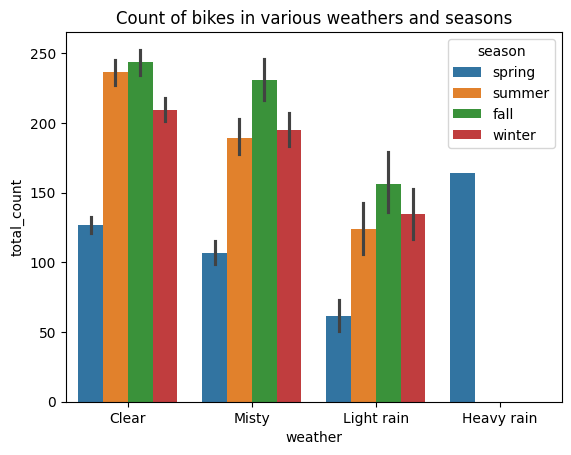

In [333]:
sns.barplot(data=data, x='weather',y='total_count', hue='season')
plt.title('Count of bikes in various weathers and seasons')
plt.show()

In [334]:
#the graph clearly shows that more people cycle in the fall and summer seasons and the number of cycles reduces as the intensity of rain increases

In [335]:
data[['temp','humidity']].describe()

,temp,humidity
count,10886.00000,10886.000000
mean,20.23086,61.886460
std,7.79159,19.245033
min,0.82000,0.000000
25%,13.94000,47.000000
50%,20.50000,62.000000
75%,26.24000,77.000000
max,41.00000,100.000000


In [336]:
data['temp_cat']=pd.qcut(data['temp'],[0,.25,.5,.75,1],labels=['very cold', 'cold','warm','hot'])

In [337]:
data['hum_cat']=pd.qcut(data['humidity'],[0,.25,.5,.75,1],labels=['dry','mild','medium','high'])

Text(0.5, 1.0, 'Bike counts by temperature and humidity conditions')

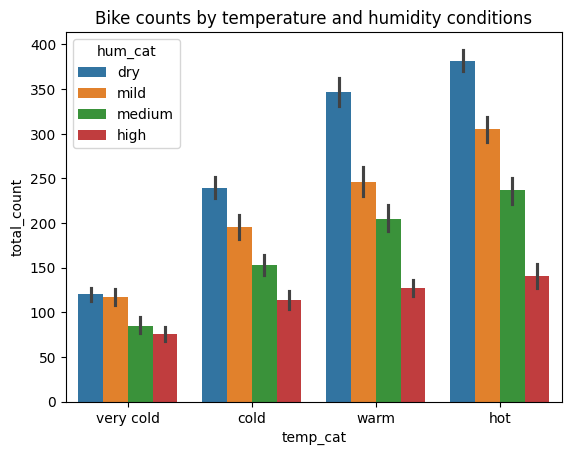

In [338]:
sns.barplot(data=data, x='temp_cat', y='total_count',hue='hum_cat')
plt.title('Bike counts by temperature and humidity conditions')

In [339]:
#clearly people use bikes more in higher temperatures lower humidity conditions

<AxesSubplot: xlabel='workingday', ylabel='total_count'>

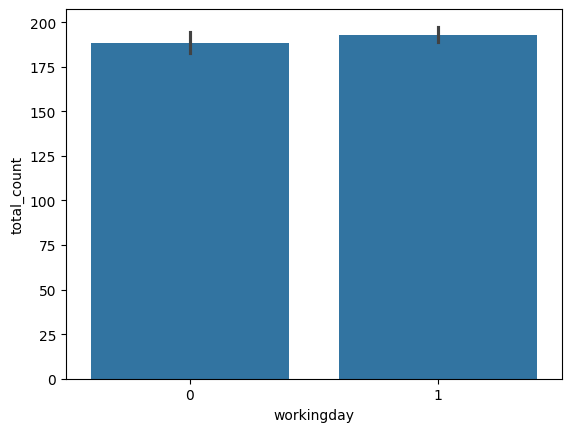

In [340]:
sns.barplot(data=data, x='workingday', y='total_count')

In [341]:
#there appears to be no difference in counts for a working day vs non working day

<AxesSubplot: xlabel='workingday', ylabel='total_count'>

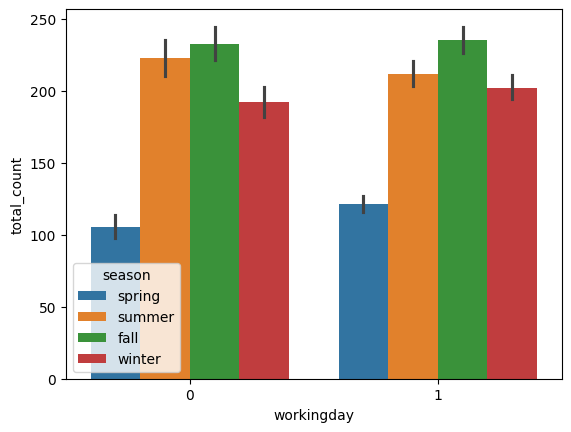

In [342]:
sns.barplot(data=data, x='workingday', y='total_count', hue='season')

In [343]:
weekend=[]
for i in range(data.shape[0]):
    if (np.logical_and(data.loc[i,'workingday']==0, data.loc[i,'holiday']==0)):
        weekend.append(1)
    else:
        weekend.append(0)

In [344]:
data['weekend']=weekend

In [345]:
day_status=[]
for i in range(data.shape[0]):
    if data.loc[i,'workingday']==1:
        day_status.append('workingday')
    elif data.loc[i,'holiday']==1:
        day_status.append('holiday')
    else:
        day_status.append('weekend')

In [346]:
data['day_status']=day_status

In [347]:
data.head()

,datetime,season,holiday,workingday,weather,temp,temp_felt,humidity,windspeed,casual,registered,total_count,temp_cat,hum_cat,weekend,day_status
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,very cold,high,1,weekend
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,very cold,high,1,weekend
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,very cold,high,1,weekend
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,very cold,medium,1,weekend
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,very cold,medium,1,weekend


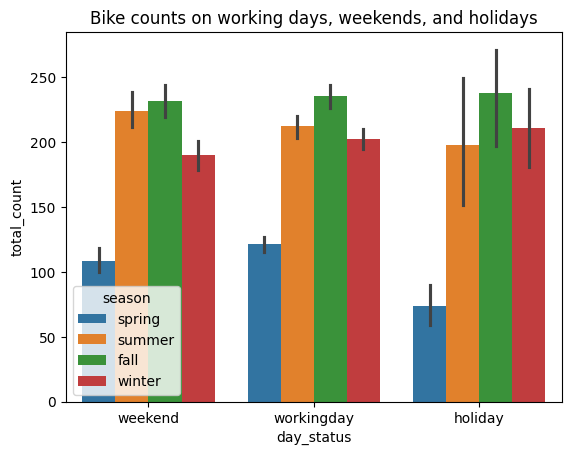

In [348]:
sns.barplot(data=data, x='day_status', y='total_count', hue='season')
plt.title('Bike counts on working days, weekends, and holidays')
plt.show()

In [349]:
#during holiday season, we see that the length of the error bars are more, we cannot be certain of the mean counts of holiday season.

In [350]:
data.groupby(['day_status','season'])['total_count'].describe()

count        mean         std  min    25%    50%     75%  \
day_status season                                                              
holiday    fall      96.0  237.822917  187.103124  4.0  58.75  183.5  419.25   
           spring    71.0   73.929577   65.433789  1.0  16.00   57.0  117.50   
           summer    48.0  197.833333  173.421063  3.0  45.50  170.5  272.00   
           winter    96.0  210.750000  163.086545  4.0  52.50  204.5  365.00   
weekend    fall     792.0  231.877525  178.015969  1.0  74.75  194.0  363.00   
           spring   787.0  108.595934  124.913311  1.0  22.00   66.0  147.50   
           summer   792.0  224.199495  193.406035  2.0  53.75  170.5  363.00   
           winter   792.0  189.881313  165.201791  1.0  58.00  139.0  296.25   
workingday fall    1845.0  235.330081  205.389382  1.0  59.00  195.0  331.00   
           spring  1828.0  121.326039  126.752528  1.0  27.00   86.0  172.00   
           summer  1893.0  211.949287  191.826204  1.0  46.00  172.0  304.00   
           winter  1846.0  202.283857  183.332525  1.0  47.00  167.0  287.75   

                     max  
day_status season         
holiday    fall    584.0  
           spring  228.0  
           summer  712.0  
           winter  596.0  
weekend    fall    783.0  
           spring  690.0  
           summer  730.0  
           winter  743.0  
workingday fall    977.0  
           spring  801.0  
           summer  873.0  
           winter  948.0

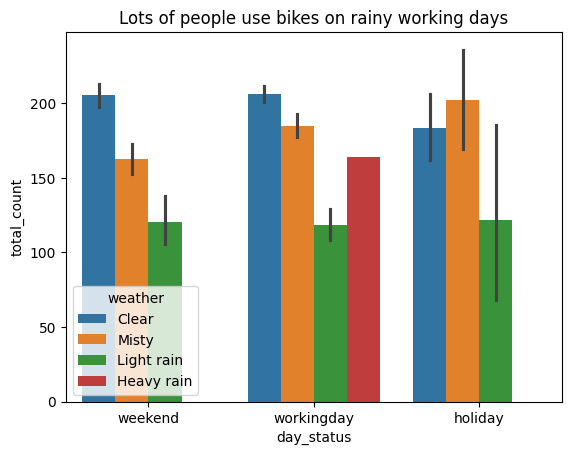

In [351]:
sns.barplot(data=data, x='day_status',y='total_count', hue='weather')
plt.title('Lots of people use bikes on rainy working days')
plt.show()

In [352]:
#Again, during holidays, the error bars are longer.

<AxesSubplot: xlabel='holiday', ylabel='total_count'>

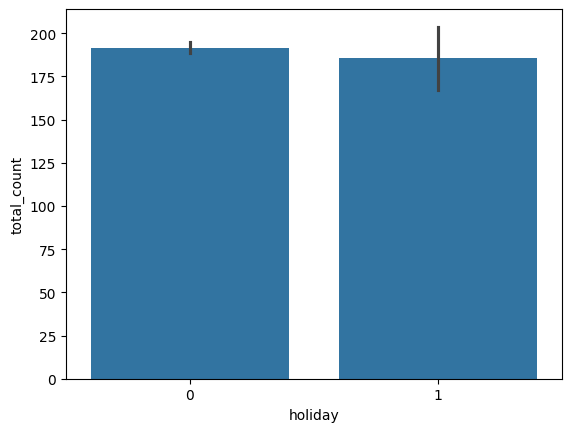

In [353]:
sns.barplot(data=data, x='holiday',y='total_count')

In [354]:
from scipy.stats import f_oneway, kstest, ttest_ind

In [355]:
scipy.stats.ttest_ind(data[data['holiday']==1]['total_count'], data[data['holiday']==0]['total_count'])

Ttest_indResult(statistic=-0.5626388963477119, pvalue=0.5736923883271103)

In [356]:
#H0: There is no difference between the mean counts of bikes during a holiday or not a holiday
#H1: The count of bikes during a holiday is different from the count of bikes on a non holiday

In [357]:
#Here the p value >0.05, so we cannot reject the null hypothesis.
#So holiday or not, the mean count remains the same

In [358]:
scipy.stats.kstest(data[data['holiday']==1]['total_count'], data[data['holiday']==0]['total_count'])

KstestResult(statistic=0.048058805196384724, pvalue=0.4735777551913273)

In [359]:
#H0: The distribution of total counts for holiday non non-holiday are similar
#H1: The distribution of total counts for holiday and non-holiday are different

In [360]:
#Here the p value>0.05, so we cannot reject the null hypothesis
#Even though it appears that the holiday count has more outliers or the data is more spread across, the distributions are still similar

<AxesSubplot: xlabel='day_status', ylabel='total_count'>

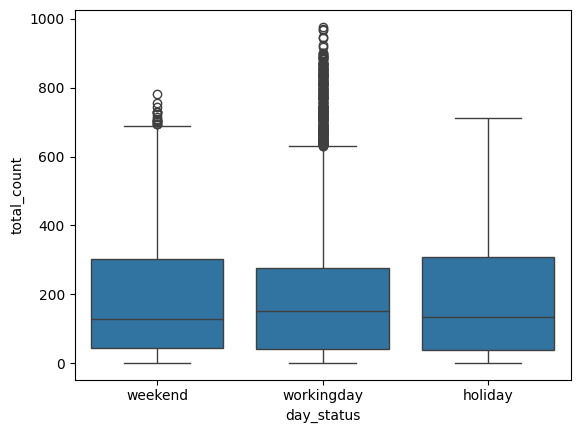

In [361]:
sns.boxplot(x=data['day_status'], y=data['total_count'])

In [362]:
#Taking only working day and holiday
scipy.stats.kstest(data[data['day_status']=='workingday']['total_count'], data[data['day_status']=='holiday']['total_count'])

KstestResult(statistic=0.05840923643418251, pvalue=0.2500861248540107)

In [363]:
scipy.stats.ttest_ind(data[data['day_status']=='workingday']['total_count'], data[data['day_status']=='holiday']['total_count'])

Ttest_indResult(statistic=0.6702439407558054, pvalue=0.5027223424517107)

In [364]:
#So the p value here is >0.05 so there is no significant difference in total count on a working day vs holiday

In [365]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_felt', 'humidity', 'windspeed', 'casual', 'registered',
       'total_count', 'temp_cat', 'hum_cat', 'weekend', 'day_status'],
      dtype='object')

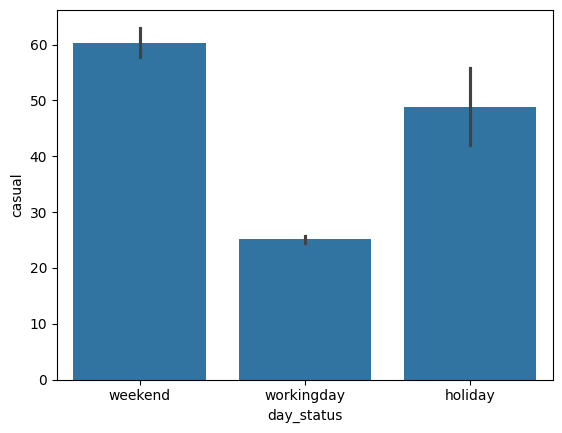

In [366]:
ax1=sns.barplot(data=data, x='day_status', y='casual')

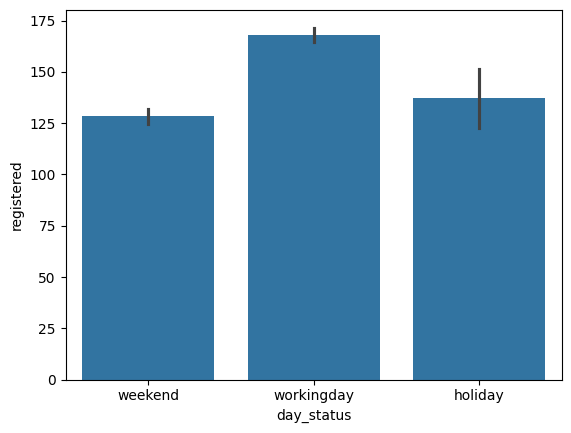

In [367]:
ax2=sns.barplot(data=data, x='day_status', y='registered')

<Figure size 1000x500 with 0 Axes>

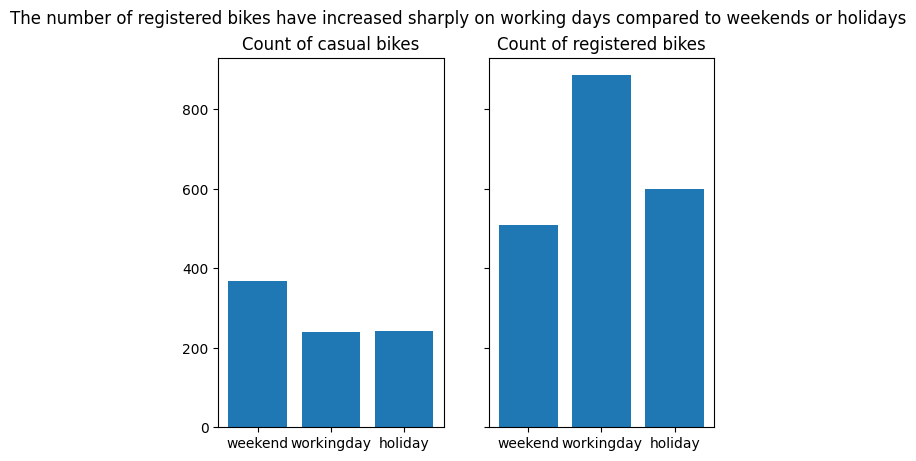

In [368]:
plt.figure(figsize=(10,5))
fig, axes=plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
axes[0].bar(data['day_status'], data['casual'])
axes[1].bar(data['day_status'], data['registered'])
axes[0].title.set_text('Count of casual bikes')
axes[1].title.set_text('Count of registered bikes')
plt.suptitle('The number of registered bikes have increased sharply on working days compared to weekends or holidays')
plt.show()

In [369]:
#This shows that the proportion of registered bikes increases on working days compared to holidays

In [370]:
import statsmodels.api as sm

In [371]:
#so prop of causal bikes on working days
casual_working_days=data[data['day_status']=='workingday']['casual'].sum()

In [372]:
casual_working_days

186098

In [373]:
sum_working_days=data[data['day_status']=='workingday']['total_count'].sum()

In [374]:
proportion_casual_wd=casual_working_days/sum_working_days
proportion_casual_wd

0.130083517171768

In [375]:
registered_working_days=data[data['day_status']=='workingday']['registered'].sum()

In [376]:
registered_working_days

1244506

In [377]:
proportion_reg_wd=registered_working_days/sum_working_days
proportion_reg_wd

0.869916482828232

In [378]:
#H0: The proportions of casual and registered bikes are the same on working days
#H1: The propotion of registered bikes are more on working days compared to causal bikes

In [379]:
sm.stats.proportions_ztest(count=[casual_working_days, registered_working_days], nobs=[sum_working_days,sum_working_days], alternative='smaller')

(-1251.4352796006085, 0.0)

In [380]:
#Here the p value is <0.05 so we reject the null hypothesis
# so the proportion of registered bikes is more on working days

In [381]:
#And if we take for weekends the proportions of registered is clearly higher

In [382]:
casual_weekends=data[data['day_status']=='weekend']['casual'].sum()

In [383]:
registered_weekends=data[data['day_status']=='weekend']['registered'].sum()

In [384]:
sum_weekends=data[data['day_status']=='weekend']['total_count'].sum()

In [385]:
casual_weekends_prop=casual_weekends/sum_weekends
casual_weekends_prop

0.3196742727747779

In [386]:
reg_weekends_prop=registered_weekends/sum_weekends
reg_weekends_prop

0.6803257272252221

In [387]:
sm.stats.proportions_ztest(count=[casual_weekends, registered_weekends], nobs=[sum_weekends, sum_weekends], alternative='smaller')

(-394.10607452746285, 0.0)

In [388]:
#if we take holidays, again the proportion of registered bikes is more

In [389]:
casual_holidays=data[data['day_status']=='holiday']['casual'].sum()

In [390]:
reg_holidays=data[data['day_status']=='holiday']['registered'].sum()

In [391]:
sum_holidays=data[data['day_status']=='holiday']['total_count'].sum()

In [392]:
hol_casual_prop=casual_holidays/sum_holidays
hol_casual_prop

0.2624377248823692

In [393]:
hol_reg_prop=reg_holidays/sum_holidays
hol_reg_prop

0.7375622751176307

In [394]:
sm.stats.proportions_ztest(count=[casual_holidays, reg_holidays], nobs=[sum_holidays, sum_holidays], alternative='smaller')

(-161.5535260943672, 0.0)

In [395]:
#the p value <0.05 so the proportion of casual bikes is clearly less than registered bikes even on holidays.

In [396]:
data['casual'].sum()

392135

In [397]:
casual_holidays/data['casual'].sum()

0.03868820686753287

In [398]:

casual_weekends/data['casual'].sum()

0.48673543550052917

In [399]:
casual_working_days/data['casual'].sum()

0.474576357631938

In [400]:
registered_working_days/data['registered'].sum()

0.7349411606994692

In [401]:
registered_weekends/data['registered'].sum()

0.23987962259225992

In [402]:
reg_holidays/data['registered'].sum()

0.025179216708270807

In [403]:
#this shows that the propotion of casual bikes is the same across weekdays and weekends
#whereas the proportion of registered bikes used on weekdays is almost triple

In [404]:
#Does the number of bikes depend on the season for holidays?

In [405]:
data['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [406]:
h_spring=data[np.logical_and(data['season']=='spring', data['day_status']=='holiday')]['total_count']
h_summer=data[np.logical_and(data['season']=='summer',data['day_status']=='holiday')]['total_count']
h_fall=data[np.logical_and(data['season']=='fall',data['day_status']=='holiday')]['total_count']
h_winter=data[np.logical_and(data['season']=='winter',data['day_status']=='holiday')]['total_count']

In [407]:
#Testing for normality

Text(0.5, 1.0, 'KDE plot for count of bikes across seasons')

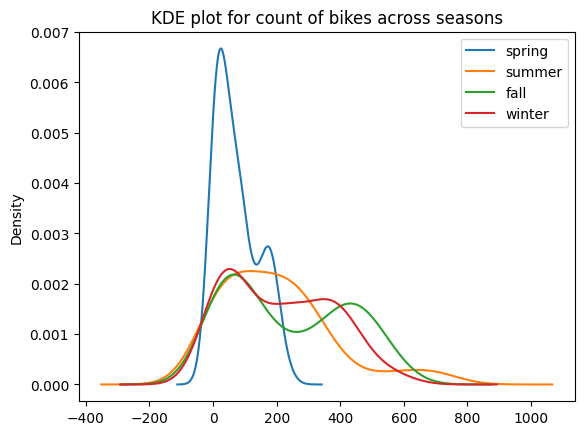

In [408]:
h_spring.plot(kind='kde')
h_summer.plot(kind='kde')
h_fall.plot(kind='kde')
h_winter.plot(kind='kde')
plt.legend(['spring','summer','fall','winter'])
plt.title('KDE plot for count of bikes across seasons')

In [409]:
scipy.stats.shapiro(h_spring)

ShapiroResult(statistic=0.8832495212554932, pvalue=7.899216143414378e-06)

In [410]:
scipy.stats.shapiro(h_summer)

ShapiroResult(statistic=0.8857237696647644, pvalue=0.00022454524878412485)

In [411]:
scipy.stats.shapiro(h_fall)

ShapiroResult(statistic=0.8922048807144165, pvalue=9.521563129055721e-07)

In [412]:
scipy.stats.shapiro(h_winter)

ShapiroResult(statistic=0.9254869818687439, pvalue=3.97333933506161e-05)

In [413]:
#H0: Data is normal
#H1: The data is not normal
#Here the p value is less than 0.05 in each case, hence we can reject h0
#The data points are not normal in any of the cases

In [414]:
#checking with qq plot as well
from statsmodels.api import qqplot

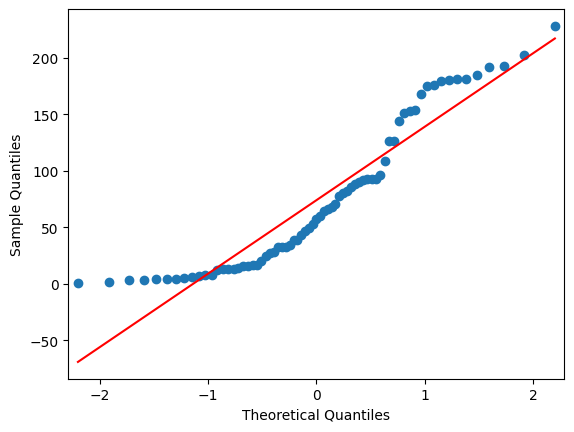

In [415]:
qqplot(h_spring, line='s')

plt.show()

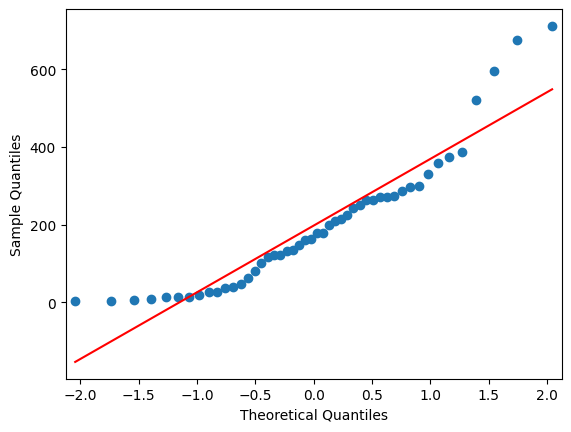

In [416]:
qqplot(h_summer, line='s')
plt.show()

In [417]:
#This is showing that the data is not normal

In [418]:
scipy.stats.kruskal(h_spring,h_summer, h_fall, h_winter)

KruskalResult(statistic=40.80039096880341, pvalue=7.208716656441622e-09)

In [419]:
#h0: There is no significant difference in the bike counts on holidays across seasons
#h1: there is a significant difference in the bike counts on holidays across seasons

In [420]:
#Here the p value of the kruskal wallis test is <0.05, so we reject the null hypothesis

In [421]:
#however if we remove spring from this, we get
scipy.stats.kruskal(h_summer, h_fall, h_winter)

KruskalResult(statistic=2.22287950421904, pvalue=0.32908481927100464)

In [422]:
#here we see the p value is 0.05 so we cannot reject the null hypothesis.

In [423]:
#So barring the spring season, the count of bikes does not vary significantly on holidays

In [424]:
#doing the same for working days as well

In [425]:
w_summer=data[np.logical_and(data['day_status']=='workingday', data['season']=='summer')]['total_count']

In [426]:
w_spring=data[np.logical_and(data['day_status']=='workingday', data['season']=='spring')]['total_count']

In [427]:
w_fall=data[np.logical_and(data['day_status']=='workingday', data['season']=='fall')]['total_count']

In [428]:
w_winter=data[np.logical_and(data['day_status']=='workingday', data['season']=='winter')]['total_count']

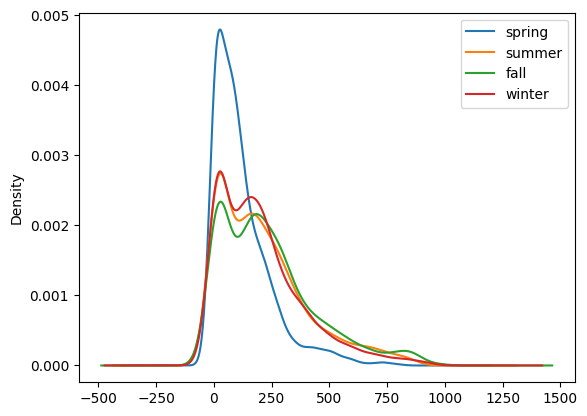

In [429]:
w_spring.plot(kind='kde')
w_summer.plot(kind='kde')
w_fall.plot(kind='kde')
w_winter.plot(kind='kde')
plt.legend(['spring','summer','fall','winter'])

In [430]:
scipy.stats.shapiro(w_spring)

ShapiroResult(statistic=0.8206428289413452, pvalue=3.857914802132654e-41)

In [431]:
scipy.stats.shapiro(w_summer)

ShapiroResult(statistic=0.8921950459480286, pvalue=1.8084303300616728e-34)

In [432]:
scipy.stats.shapiro(w_fall)

ShapiroResult(statistic=0.8985651731491089, pvalue=2.7990698831047533e-33)

In [433]:
scipy.stats.shapiro(w_winter)

ShapiroResult(statistic=0.8870124220848083, pvalue=9.81458115643693e-35)

In [434]:
#H0:Data is normal
#H1: Data is not normal

In [435]:
#Here the p values are <0.05, so we reject the null hypothesis in each case

In [436]:
#Trying the kruskal wallis test
#H0: The bike counts are similar across all seasons on working days
#H1: The bike counts are different in at least one season

In [437]:
scipy.stats.kruskal(w_spring, w_summer, w_fall, w_winter)

KruskalResult(statistic=413.24839780803524, pvalue=2.9877439742083506e-89)

In [438]:
#At least one of the distributions is not similar

In [439]:
#removing the spring season

In [440]:
scipy.stats.kruskal(w_summer, w_winter)

KruskalResult(statistic=1.4037608381768774, pvalue=0.23609489733863362)

In [441]:
#If we remove the spring and fall seasons there is no significant difference in the bike counts in summer and winter on working days

In [442]:
from scipy.stats import levene

In [443]:
levene(w_spring, w_summer, w_fall,w_winter)

LeveneResult(statistic=108.68970999874477, pvalue=7.237714212687931e-69)

In [444]:
#H0: The variances in bike sales are equal across all seasons on working days
#H1: The variances in bike sales on working days differ signficantly across seasons

In [445]:
#Since the kruskal wallis test failed, I will run the post hoc test

In [446]:
#since the variances are not equal across groups I should run the Games Howell posthoc test
#if the variances were equal I would have run the tuckey-hsd test

In [447]:
#I am using the pingouin library because I find it easier to write the syntax compared to the statsmodels way for this 

In [448]:
import pingouin

In [449]:
import pingouin as pg

In [450]:
pg.pairwise_gameshowell(data=data[data['day_status']=='workingday'], dv='total_count', between='season')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,fall,spring,235.330081,121.326039,114.004042,5.626130,20.263314,3075.459816,0.000000,0.667182
1,fall,summer,235.330081,211.949287,23.380794,6.504076,3.594791,3703.389812,0.001867,0.117683
2,fall,winter,235.330081,202.283857,33.046224,6.408726,5.156442,3641.952480,0.000002,0.169720
3,spring,summer,121.326039,211.949287,-90.623247,5.312962,-17.057011,3292.618186,0.000000,-0.555400
4,spring,winter,121.326039,202.283857,-80.957818,5.195799,-15.581399,3283.489807,0.000000,-0.513135
5,summer,winter,211.949287,202.283857,9.665430,6.135633,1.575295,3735.486271,0.392908,0.051489


In [451]:
#so we see that only summer and winter have no difference on working days in terms of bike counts

In [452]:
#doing this for weekends as well

In [453]:
we_summer=data[np.logical_and(data['day_status']=='weekend', data['season']=='summer')]['total_count']

In [454]:
we_winter=data[np.logical_and(data['day_status']=='weekend', data['season']=='winter')]['total_count']

In [455]:
we_spring=data[np.logical_and(data['day_status']=='weekend', data['season']=='spring')]['total_count']
we_fall=data[np.logical_and(data['day_status']=='weekend', data['season']=='fall')]['total_count']

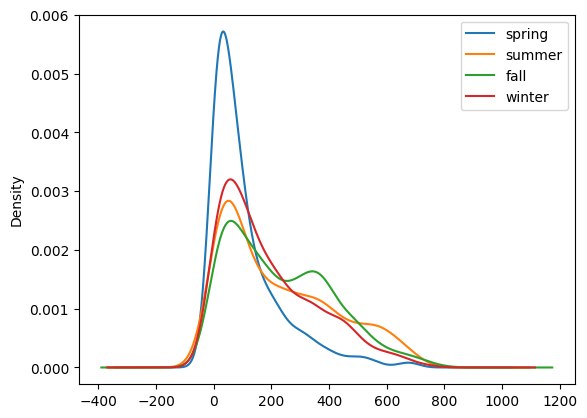

In [456]:
we_spring.plot(kind='kde')
we_summer.plot(kind='kde')
we_fall.plot(kind='kde')
we_winter.plot(kind='kde')
plt.legend(['spring','summer','fall','winter'])
#clearly the data is not normal

In [457]:
scipy.stats.kruskal(we_spring, we_summer,we_fall,we_winter)

KruskalResult(statistic=272.94917968673843, pvalue=7.102351053098648e-59)

In [458]:
#H0: There is no difference in the median of bike counts across seasons on weekends
#H1: The median count of bikes is different for different seasons on weekends

In [459]:
#here the p value is < 0.05 so we reject the null hypothesis

In [460]:
scipy.stats.levene(we_spring, we_summer, we_fall, we_winter)

LeveneResult(statistic=76.66673015109801, pvalue=7.24558990387801e-48)

In [461]:
#H0: the variance of bike counts is homogenous across seasons on weekends
#H1: the variance of bike counts is not homogenous on weekends


In [462]:
#Here the p value <0.05 so we can reject our null hypothesis

In [463]:
#since the levene's test has failed I will go with the games howell posthoc test
pg.pairwise_gameshowell(data=data[data['day_status']=='weekend'], dv='total_count', between='season')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,fall,spring,231.877525,108.595934,123.281591,7.735540,15.937038,1418.586940,0.000000e+00,0.800892
1,fall,summer,231.877525,224.199495,7.678030,9.340337,0.822029,1571.246250,8.440661e-01,0.041289
2,fall,winter,231.877525,189.881313,41.996212,8.629679,4.866486,1573.252369,7.441099e-06,0.244434
3,spring,summer,108.595934,224.199495,-115.603561,8.188774,-14.117323,1354.315535,3.164136e-14,-0.709285
4,spring,winter,108.595934,189.881313,-81.285379,7.367868,-11.032415,1472.510619,6.877832e-13,-0.554536
5,summer,winter,224.199495,189.881313,34.318182,9.038185,3.797021,1544.259015,8.748219e-04,0.190717


In [464]:
#here we see that the p value is .844 between fall and summer, so the bike count will remain from the summer to the fall

In [465]:
#now I turn my attention to the time of the day

In [466]:
data.dtypes

datetime         object
season           object
holiday          object
workingday       object
weather          object
temp            float64
temp_felt       float64
humidity          int64
windspeed       float64
casual            int64
registered        int64
total_count       int64
temp_cat       category
hum_cat        category
weekend           int64
day_status       object
dtype: object

In [467]:
import datetime

In [468]:
from datetime import datetime as dt

In [469]:
data['datetime']=pd.to_datetime(data['datetime'])

In [470]:
data.dtypes

datetime       datetime64[ns]
season                 object
holiday                object
workingday             object
weather                object
temp                  float64
temp_felt             float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
total_count             int64
temp_cat             category
hum_cat              category
weekend                 int64
day_status             object
dtype: object

In [471]:
data['time']=data['datetime'].dt.time

In [472]:
data['time']

0        00:00:00
1        01:00:00
2        02:00:00
3        03:00:00
4        04:00:00
           ...   
10881    19:00:00
10882    20:00:00
10883    21:00:00
10884    22:00:00
10885    23:00:00
Name: time, Length: 10886, dtype: object

In [473]:
data['hour_of_day']=[data.loc[i,'time'].hour for i in range(data.shape[0])] #I extracted the hour from the time part

In [474]:
data['hour_of_day']

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour_of_day, Length: 10886, dtype: int64

In [475]:
data.groupby('hour_of_day')['total_count'].mean()

hour_of_day
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total_count, dtype: float64

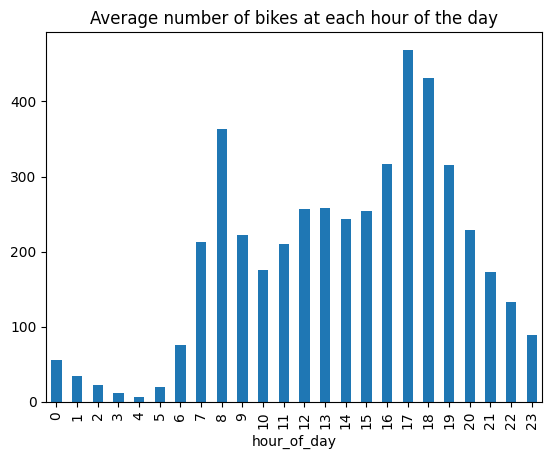

In [476]:
data.groupby('hour_of_day')['total_count'].mean().plot(kind='bar') #This shows that on an average the count of bikes is maximum at 6pm and 8am, which is usually office timings
plt.title('Average number of bikes at each hour of the day')
plt.show()

In [477]:
#data.groupby(['holiday','hour_of_day'])['total_count'].mean()

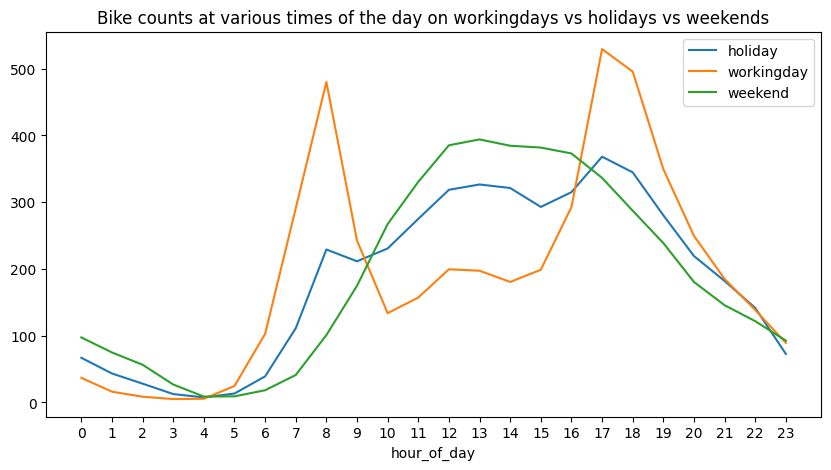

In [478]:
plt.figure(figsize=(10,5))
data[data['day_status']=='holiday'].groupby('hour_of_day')['total_count'].mean().plot(kind='line')
data[data['day_status']=='workingday'].groupby('hour_of_day')['total_count'].mean().plot(kind='line')
data[data['day_status']=='weekend'].groupby('hour_of_day')['total_count'].mean().plot(kind='line')
plt.legend(['holiday','workingday','weekend'])
plt.xticks(range(24))
plt.title('Bike counts at various times of the day on workingdays vs holidays vs weekends')
plt.show()

In [479]:
#We see that working days see maximum counts around 7am and 530pm, while on weekends and holidays the counts peak between 11am-4pm

In [480]:
#H0: There is no difference in the bike counts through the day on workingdays vs holidays vs weekends
#H1: There is a significant difference in the bike counts through the day on workingdays vs holidays vs weekends

In [481]:
holiday_dist=data[data['day_status']=='holiday'].groupby('hour_of_day')['total_count'].mean()
workingday_dist=data[data['day_status']=='workingday'].groupby('hour_of_day')['total_count'].mean()
weekend_dist=data[data['day_status']=='weekend'].groupby('hour_of_day')['total_count'].mean()

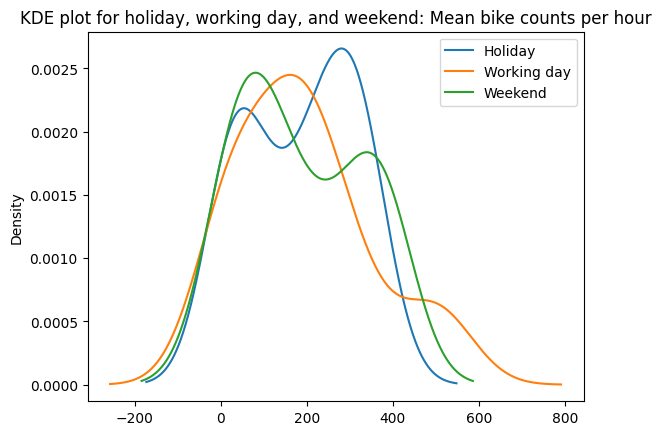

In [482]:
holiday_dist.plot(kind='kde')
workingday_dist.plot(kind='kde')
weekend_dist.plot(kind='kde')
plt.legend(['Holiday','Working day','Weekend'])
plt.title('KDE plot for holiday, working day, and weekend: Mean bike counts per hour')
plt.show()

In [483]:
scipy.stats.shapiro(workingday_dist) #The normality test has failed even for the working day counts.

ShapiroResult(statistic=0.9128820300102234, pvalue=0.04074829816818237)

In [484]:
scipy.stats.kruskal(holiday_dist, workingday_dist, weekend_dist)

KruskalResult(statistic=0.07933789954336135, pvalue=0.9611075613698323)

In [485]:
#Here the p value is >0.05, so we cannot reject the null hypothesis
#so we cannot say that the average of the bike count through the day are significantly different between weekdays, weekends, and holidays

In [486]:
#to check whether the fluctuations are significantly different, I am running the ks test
scipy.stats.kstest(workingday_dist, holiday_dist)

KstestResult(statistic=0.20833333333333334, pvalue=0.686017125117228)

In [487]:
#again the p value is >0.05 so we cannot reject the null hypothesis.
#Therefore the fluctuations in bike counts through the day do not appear statistically significant

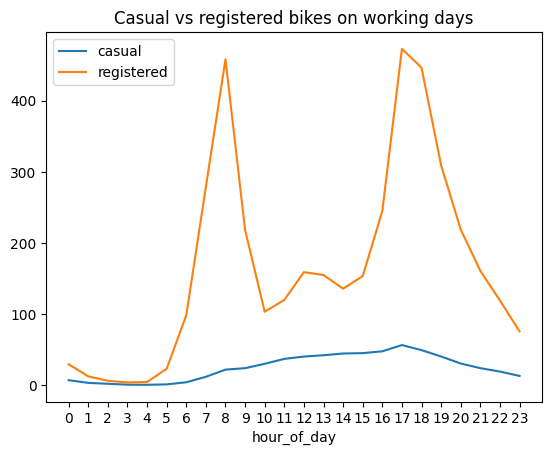

In [488]:
data[data['day_status']=='workingday'].groupby('hour_of_day')['casual'].mean().plot()
data[data['day_status']=='workingday'].groupby('hour_of_day')['registered'].mean().plot()
plt.xticks(range(24))
plt.legend(['casual', 'registered'])
plt.title('Casual vs registered bikes on working days')
plt.show()

In [489]:
casual_wd=data[data['day_status']=='workingday'].groupby('hour_of_day')['casual'].mean()
registered_wd=data[data['day_status']=='workingday'].groupby('hour_of_day')['registered'].mean()

In [490]:
#To test whether the bike count variation is significant between registered and casual bikes, I will run the Mann Whitney U test
#The Mann Whitney U test is the non parametric equivalent of the the t test.

In [491]:
#H0: There is no difference in the median number of registered and casual bikes on working days
#H1: The median counts of registered and casual bikes on working days is different

In [492]:
scipy.stats.mannwhitneyu(casual_wd, registered_wd)

MannwhitneyuResult(statistic=95.0, pvalue=7.208919288681029e-05)

In [493]:
#Here the p value is <0.05 so we can reject our null hypothesis
#The count of registered bikes through the day is very different from the count of casual bikes through the day on working days

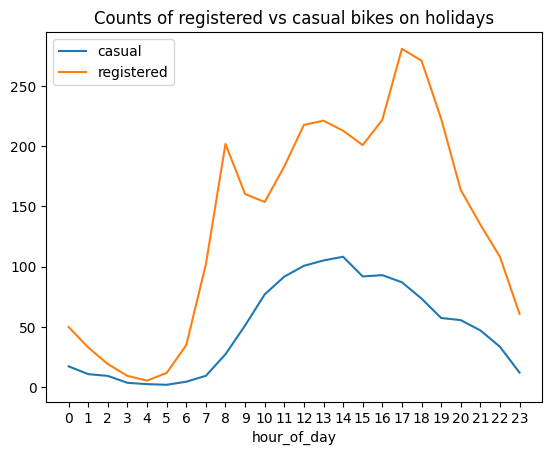

In [494]:
data[data['day_status']=='holiday'].groupby('hour_of_day')['casual'].mean().plot()
data[data['day_status']=='holiday'].groupby('hour_of_day')['registered'].mean().plot()
plt.xticks(range(24))
plt.legend(['casual','registered'])
plt.title('Counts of registered vs casual bikes on holidays')
plt.show()

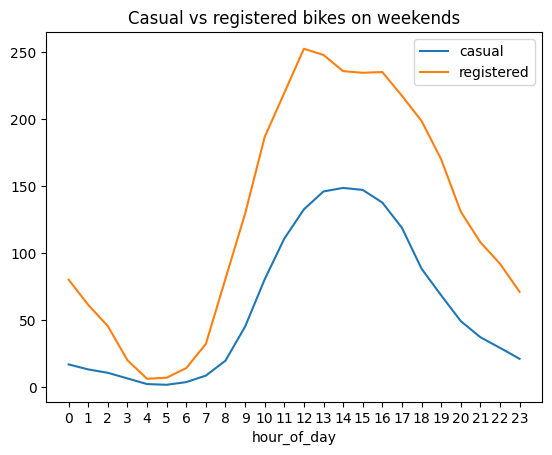

In [495]:
data[data['day_status']=='weekend'].groupby('hour_of_day')['casual'].mean().plot()
data[data['day_status']=='weekend'].groupby('hour_of_day')['registered'].mean().plot()
plt.legend(['casual','registered'])
plt.xticks(range(24))
plt.title('Casual vs registered bikes on weekends')
plt.show()

In [496]:
#For weekends, there is no spike in the count in the morning/evening

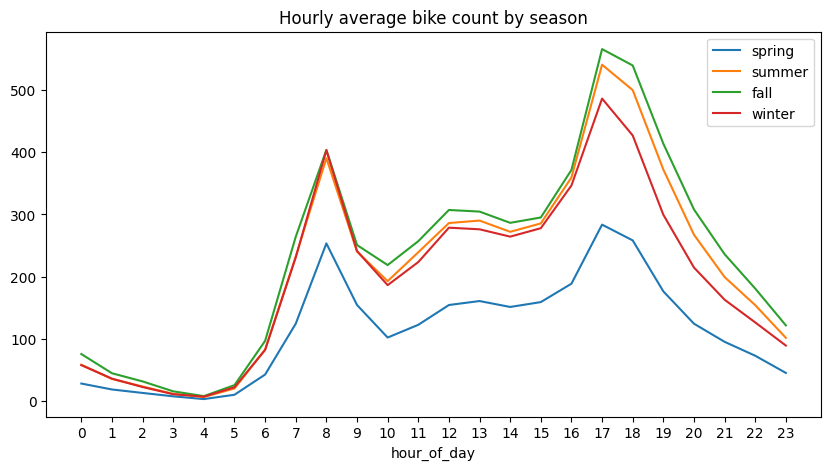

In [497]:
plt.figure(figsize=(10,5))
data[data['season']=='spring'].groupby('hour_of_day')['total_count'].mean().plot(kind='line')
data[data['season']=='summer'].groupby('hour_of_day')['total_count'].mean().plot(kind='line')
data[data['season']=='fall'].groupby('hour_of_day')['total_count'].mean().plot(kind='line')
data[data['season']=='winter'].groupby('hour_of_day')['total_count'].mean().plot(kind='line')
plt.legend(['spring','summer','fall','winter'])
plt.xticks(range(24))
plt.title('Hourly average bike count by season')
plt.show()

In [498]:
#We see very clearly that the spring season has very low usage while the summer and fall seasons see maximum usage during the evening time

In [ ]:
pd.crosstab(index=data['hour_of_day'], values)

In [519]:
ct_weather=pd.crosstab(index=data[data['weather']!='Heavy rain']['weather'], columns=data[data['weather']!='Heavy rain']['hour_of_day'],values=data[data['weather']!='Heavy rain']['total_count'], aggfunc='mean')

In [520]:
scipy.stats.chi2_contingency(ct_weather.T)

(52.29472095475185,
 0.24279588858115392,
 46,
 array([[ 56.0544094 ,  30.7305126 ,  50.20039953],
        [ 36.70219931,  20.12111822,  32.86922633],
        [ 25.29151268,  13.86547744,  22.65020816],
        [ 12.68567804,   6.95462485,  11.36085658],
        [  7.18897849,   3.94118851,   6.43820168],
        [ 22.63232747,  12.40764165,  20.26873342],
        [ 87.72869896,  48.09519747,  78.56680296],
        [236.21677411, 129.50029501, 211.54761175],
        [398.05568801, 218.22467613, 356.48497216],
        [240.79740756, 132.01151965, 215.6498694 ],
        [179.44349701,  98.37568009, 160.70341905],
        [213.12627426, 116.84147112, 190.86855491],
        [267.6327878 , 146.7233862 , 239.6827122 ],
        [262.02214708, 143.64748428, 234.6580155 ],
        [252.76977083, 138.57508645, 226.37190582],
        [270.36737004, 148.22255665, 242.13170992],
        [339.79178067, 186.28285821, 304.30582233],
        [506.84403329, 277.86532977, 453.91206944],
        [475.3515

In [514]:
#The p value is 0.24>0.05 so the counts across weather are not significantly impacting counts across the day

In [522]:
ct_season=pd.crosstab(index=data['season'], columns=data['hour_of_day'], values=data['total_count'], aggfunc='mean').T

In [523]:
ct_season

season,fall,spring,summer,winter
hour_of_day,,,,
0,75.675439,28.292035,58.473684,57.877193
1,44.831858,18.761062,35.640351,36.166667
2,31.707965,13.205607,23.482456,22.684211
3,15.778761,7.760417,11.714286,11.169643
4,8.087719,3.336634,6.628319,7.228070
5,25.728070,10.300000,20.377193,22.333333
6,96.780702,42.725664,82.982456,82.254386
7,264.035088,124.433628,232.263158,230.956140
8,403.508772,253.345133,390.192982,403.070175


In [524]:
scipy.stats.chi2_contingency(ct_season)

(56.84545017744842,
 0.8519594982197431,
 69,
 array([[ 67.64951346,  33.11572847,  62.11276812,  57.44034114],
        [ 41.57502029,  20.35176623,  38.17233063,  35.30082075],
        [ 27.96650303,  13.6901372 ,  25.67759662,  23.74600189],
        [ 14.25437571,   6.97778907,  13.08773246,  12.10320905],
        [  7.76253938,   3.79991124,   7.12721768,   6.59107342],
        [ 24.176959  ,  11.83508304,  22.19820618,  20.52834827],
        [ 93.57245827,  45.80550491,  85.91406065,  79.45118375],
        [261.51375713, 128.01597721, 240.11027612, 222.04800382],
        [445.26347084, 217.96497041, 408.82107352, 378.06754779],
        [272.21217017, 133.25305466, 249.93308215, 231.1318902 ],
        [214.85438241, 105.17532242, 197.26971787, 182.43012241],
        [258.51639854, 126.54871295, 237.35823506, 219.50298477],
        [315.0476304 , 154.2218303 , 289.26269255, 267.50293447],
        [316.6179126 , 154.99051342, 290.70445568, 268.83624111],
        [299.0000466 , 146.366

In [ ]:
#Are the mean counts different for different timings across working day and holiday and weekend?

In [528]:
#H0: The mean hourly counts of bikes across weekends, working days, and holidays is not significantly different
#H1: The mean hourly counts of bikes are very different for working days, weekends, and holidays

In [540]:
ct_day_status=pd.crosstab(index=data['hour_of_day'], columns=data['day_status'], values=data['total_count'], aggfunc='mean')

In [541]:
stat, pval, df, exp=scipy.stats.chi2_contingency(ct_day_status)

In [542]:
pval

3.1299369865862945e-227

In [543]:
#the p value is <0.05 so we reject the null hypothesis, there is a significant difference in the hourly counts on weekends and working days, and holidays

In [499]:
data.groupby('hour_of_day')['weather'].value_counts()

hour_of_day  weather   
0            Clear         304
             Misty         123
             Light rain     28
1            Clear         296
             Misty         120
                          ... 
22           Misty         105
             Light rain     33
23           Clear         310
             Misty         103
             Light rain     43
Name: count, Length: 73, dtype: int64

In [500]:
data

,datetime,season,holiday,workingday,weather,temp,temp_felt,humidity,windspeed,casual,registered,total_count,temp_cat,hum_cat,weekend,day_status,time,hour_of_day
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,very cold,high,1,weekend,00:00:00,0
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,very cold,high,1,weekend,01:00:00,1
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,very cold,high,1,weekend,02:00:00,2
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,very cold,medium,1,weekend,03:00:00,3
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,very cold,medium,1,weekend,04:00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,cold,mild,0,workingday,19:00:00,19
10882,2012-12-19 20:00:00,winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,cold,mild,0,workingday,20:00:00,20
10883,2012-12-19 21:00:00,winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,very cold,mild,0,workingday,21:00:00,21
10884,2012-12-19 22:00:00,winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,very cold,mild,0,workingday,22:00:00,22


In [502]:
#here as well, the p value >0.05 so even the fluctuations through the day are not significant

In [503]:
#Finally, how should yulu plan to stock up its miracle bikes?
#1. We see that the usage on working days peaks around 7am and 6pm to around 500 bikes per hour
#On weekends and holidays, mornings and evenings have around 200-250 bikes per hour
#Between 11am-4pm, it this trend is reversed-there are fewer bikes on weekdays and more bikes on weekends
#So the company should plan to keep a stock of 500 bikes a day and during the non peak hours it can offer discounted pricing to boost usage
#Alternatively, it can increase its rates during peak hours of usage.

#2. We see a significant difference in usage across seasons: We see very little of the usage happening in the spring season so the company can reduce prices during spring.
#Or better still, it can promote some activities that bring people to use its bikes during the spring season.

#3. We see that most of the surge happens in registered bikes during weekdays, while casual bikes remain more or less the same across weekdays and weekends.
#So the aim is to increase the prices of casual bikes because registered bikes represent the majority customers.

#People use bikes in heavy rain particularly in workin days in spring-so the company has an opportunity here to provide services to avoid getting wet.

#Season or weather have no impact on the hourly average count, the pattern remains the same.
